In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
songs = pd.read_csv('D:\justi\Documents\msd\songs.csv')
addnl = pd.read_table('./data/tagtraum/msd_tagtraum_cd1.cls/msd_tagtraum_cd1.txt', sep='\t', skiprows=7, names=['track_id', 'Tag1', 'Tag2'])

In [3]:
df_m = songs.merge(addnl, on='track_id')

In [4]:
df_m.shape

(3044, 56)

In [5]:
df_m.iloc[1,:]

Unnamed: 0                                                           3
analysis_sample_rate                                             22050
audio_md5                             5712e954dd6e9e3265b14b51f030372e
danceability                                                         0
duration                                                       222.876
end_of_fade_in                                                       0
energy                                                               0
idx_bars_confidence                                                  0
idx_bars_start                                                       0
idx_beats_confidence                                                 0
idx_beats_start                                                      0
idx_sections_confidence                                              0
idx_sections_start                                                   0
idx_segments_confidence                                              0
idx_se

There are several categoricals that should be removed as they are not appropriate for the analysis we want to calculate. For example, track names, artist name and album name are all unuseful. Additionally, everything with an
idx label can be dropped as the data is incomplete. Finally, any value that does not change can be removed.

In [6]:
df_m.drop(columns = ['Unnamed: 0','genre', 'artist_mbid', 'artist_name','release', 'release_7digitalid', 'audio_md5', 'track_id',
                     'song_id', 'title', 'track_7digitalid', 'Tag2', 'artist_id', 'artist_7digitalid', 'artist_playmeid'], inplace = True)

In [7]:
cols = [c for c in df_m.columns if c[0:3] != 'idx']
df_m=df_m[cols]
df_m.head()

,analysis_sample_rate,danceability,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,...,time_signature_confidence,analyzer_version,artist_familiarity,artist_hotttnesss,artist_latitude,artist_location,artist_longitude,song_hotttnesss,year,Tag1
0,22050,0.0,211.59138,0.000,0.0,7,0.488,-7.446,1,0.677,...,0.778,NaN,0.531736,0.409133,57.15382,"Aberdeen, Scotland",-2.10679,NaN,1997,Pop_Rock
1,22050,0.0,222.87628,0.000,0.0,3,0.893,-10.210,1,0.631,...,0.271,NaN,0.818745,0.539509,37.77916,"San Francisco, California",-122.42005,NaN,1966,Pop_Rock
2,22050,0.0,193.93261,0.984,0.0,10,0.413,-9.923,1,0.448,...,1.000,NaN,0.815650,0.590374,NaN,NaN,NaN,NaN,2005,Electronic
3,22050,0.0,180.55791,0.472,0.0,7,0.620,-10.738,1,0.521,...,0.000,NaN,0.743284,0.461002,NaN,NaN,NaN,0.447136,1993,Pop_Rock
4,22050,0.0,280.21506,0.238,0.0,5,0.555,-3.306,1,0.500,...,0.120,NaN,0.780462,0.574275,NaN,"Atlanta, GA",NaN,0.597641,2001,Pop_Rock


In [8]:
cols = [c for c in df_m.columns if df_m[c].nunique() >1]
df_m=df_m[cols]
df_m.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss,artist_latitude,artist_location,artist_longitude,song_hotttnesss,year,Tag1
0,211.59138,0.000,7,0.488,-7.446,1,0.677,200.783,84.530,4,0.778,0.531736,0.409133,57.15382,"Aberdeen, Scotland",-2.10679,NaN,1997,Pop_Rock
1,222.87628,0.000,3,0.893,-10.210,1,0.631,222.876,130.480,3,0.271,0.818745,0.539509,37.77916,"San Francisco, California",-122.42005,NaN,1966,Pop_Rock
2,193.93261,0.984,10,0.413,-9.923,1,0.448,175.914,120.002,4,1.000,0.815650,0.590374,NaN,NaN,NaN,NaN,2005,Electronic
3,180.55791,0.472,7,0.620,-10.738,1,0.521,165.790,117.996,1,0.000,0.743284,0.461002,NaN,NaN,NaN,0.447136,1993,Pop_Rock
4,280.21506,0.238,5,0.555,-3.306,1,0.500,275.528,173.205,5,0.120,0.780462,0.574275,NaN,"Atlanta, GA",NaN,0.597641,2001,Pop_Rock


In [9]:
df_m.shape

(3044, 19)

The artist features should also be dropped. The analysis here is using song information.

In [11]:
cols = [c for c in df_m.columns if c[0:6] != 'artist']
df_m=df_m[cols]
df_m.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,song_hotttnesss,year,Tag1
0,211.59138,0.000,7,0.488,-7.446,1,0.677,200.783,84.530,4,0.778,NaN,1997,Pop_Rock
1,222.87628,0.000,3,0.893,-10.210,1,0.631,222.876,130.480,3,0.271,NaN,1966,Pop_Rock
2,193.93261,0.984,10,0.413,-9.923,1,0.448,175.914,120.002,4,1.000,NaN,2005,Electronic
3,180.55791,0.472,7,0.620,-10.738,1,0.521,165.790,117.996,1,0.000,0.447136,1993,Pop_Rock
4,280.21506,0.238,5,0.555,-3.306,1,0.500,275.528,173.205,5,0.120,0.597641,2001,Pop_Rock


Finally. While they aren't necessarily out of the scope of the analysis. Given that this objective is meant to be used as a tool to predict new songs it seems the information provided cannot be used so they will be dropped

In [13]:
df_m.drop(columns = ['song_hotttnesss', 'year'], inplace = True)

KeyError: "['song_hotttnesss' 'year'] not found in axis"

In [14]:
df_m.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,Tag1
0,211.59138,0.000,7,0.488,-7.446,1,0.677,200.783,84.530,4,0.778,Pop_Rock
1,222.87628,0.000,3,0.893,-10.210,1,0.631,222.876,130.480,3,0.271,Pop_Rock
2,193.93261,0.984,10,0.413,-9.923,1,0.448,175.914,120.002,4,1.000,Electronic
3,180.55791,0.472,7,0.620,-10.738,1,0.521,165.790,117.996,1,0.000,Pop_Rock
4,280.21506,0.238,5,0.555,-3.306,1,0.500,275.528,173.205,5,0.120,Pop_Rock


In [38]:
df_m.loc[:, df_m.isna().any()].head()

""
0
1
2
3
4


Since there are no na values, we can proceed with further analytical measures

In [20]:
df_m['Tag1'].nunique()

13

Now that we have useable variables. They can be explore

In [29]:
import seaborn as sns

### Looking at distributions of different values at different categories

#### Loudness

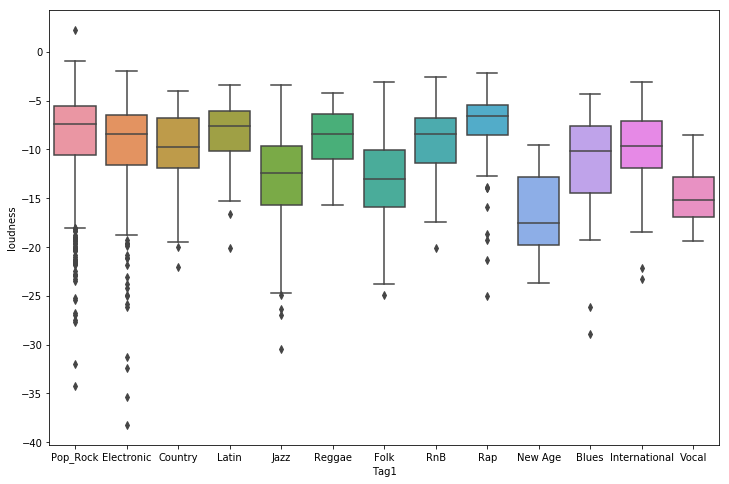

In [35]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='loudness', ax = ax)

#### Duration

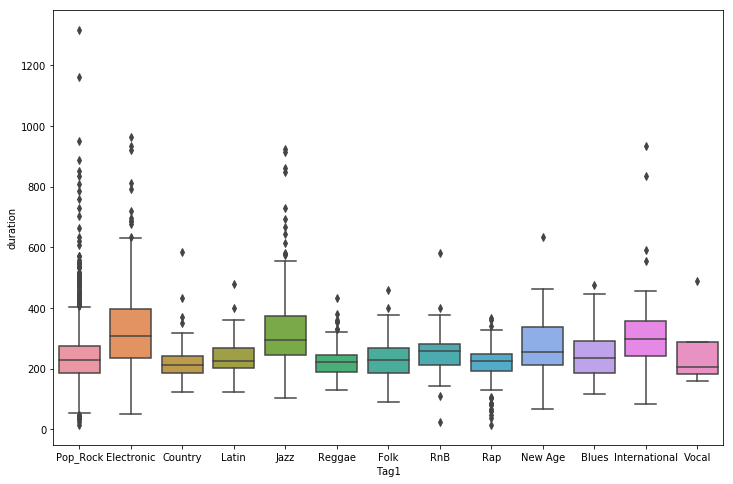

In [36]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='duration', ax = ax)

#### start_of_fade_out

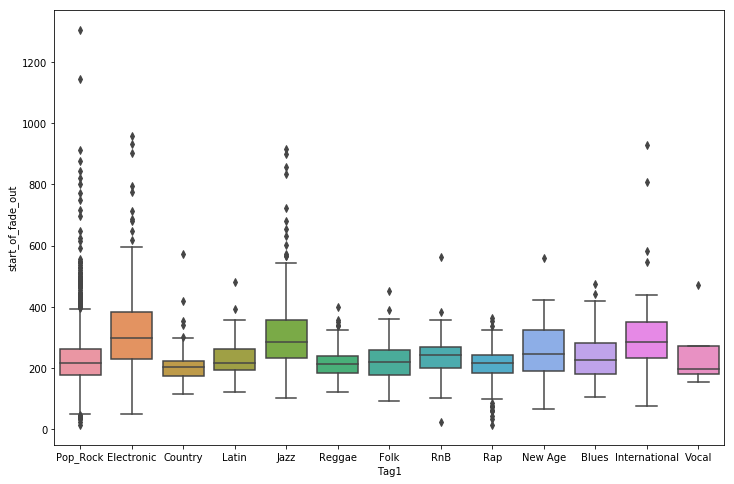

In [39]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='start_of_fade_out', ax = ax)

#### Tempo

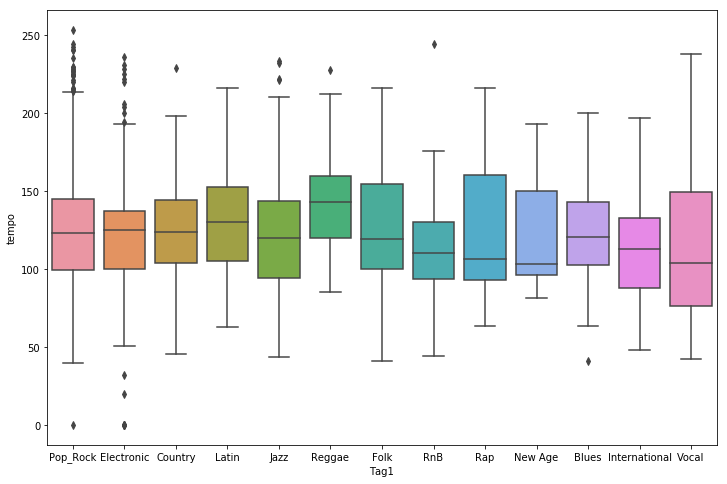

In [40]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='tempo', ax = ax)

### Now to visualize the categoricals

#### Mode

In [78]:
sub = df_m[['mode', 'Tag1']]

In [79]:
sub.vals =  sub.groupby(['mode','Tag1']).size()

C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [81]:
values = sub.vals.values.reshape(13,2)

array([[  24,   18],
       [ 157,   19],
       [  13,   73],
       [  22,   10],
       [ 544,   55],
       [  34,   37],
       [   2,   43],
       [ 109,  211],
       [  57,   23],
       [ 119,   45],
       [  19, 1232],
       [  69,   53],
       [  54,    2]], dtype=int64)

In [83]:
df = pd.DataFrame(values, index=sub['Tag1'].unique(), columns=[0,1])

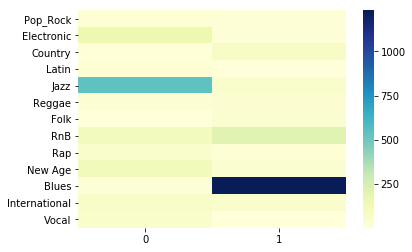

In [87]:
sns.heatmap(df,cmap="YlGnBu")

#### Time Signature

In [108]:
sub = df_m[['time_signature', 'Tag1']]

In [112]:
tally = pd.crosstab(sub['Tag1'],sub['time_signature'])
tally = tally.iloc[:, 1:]
tally

time_signature,1,3,4,5,7
Tag1,,,,,
Blues,16,15,35,0,1
Country,11,18,96,1,1
Electronic,37,44,254,24,9
Folk,8,16,47,2,3
International,4,5,19,6,2
Jazz,26,29,102,26,9
Latin,3,8,50,2,4
New Age,3,6,18,1,1
Pop_Rock,228,180,1256,70,41


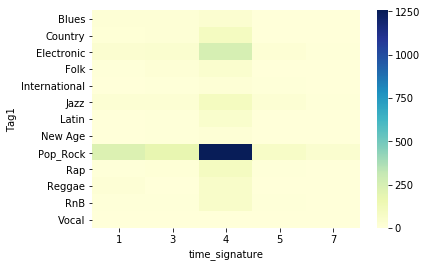

In [114]:
sns.heatmap(tally, cmap="YlGnBu")